<a href="https://colab.research.google.com/github/riaagarwal21/Melbourne-Housing-Problem/blob/main/melbourne_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#We need to upload the full dataset after extracting the file from zip
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['Melbourne_housing_FULL.csv']))
df.head(2)

Saving Melbourne_housing_FULL.csv to Melbourne_housing_FULL (3).csv


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


In [ ]:
#Checking the number and type of Features provided
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
 data_info= pd.DataFrame({"Column_names":
                         ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
                           'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
                        
    
                        "Description":["""Suburb""","""Address""","""Number of rooms""",
                                       """Type 
                                       br - bedroom(s);
                                       h - house,cottage,villa, semi,terrace;
                                       u - unit, duplex;
                                       t - townhouse;
                                       dev site - development site; 
                                       o res - other residential.""",
                                    """Price in Australian dollars""",
                        """Method: 
                        S - property sold;
                        SP - property sold prior;
                        PI - property passed in;
                        PN - sold prior not disclosed;
                        SN - sold not disclosed;
                        NB - no bid;
                        VB - vendor bid;
                        W - withdrawn prior to auction;
                        SA - sold after auction;
                        SS - sold after auction price not disclosed.
                        N/A - price or highest bid not available.""",
                                       
                        """Real Estate Agent""","""Date sold""","""Distance from CBD in Kilometres""","""Postcode""","""Scraped # of Bedrooms (from different source)""",
                        """ Number of Bathrooms""","""Number of carspots""","""Land Size in Metres""", """Building Size in Metres""",
                        """Year the house was built""","""Governing council for the area""","""Lattitude""", """Longtitude"""
                        ,"""General Region (West, North West, North, North east …etc)""",
                        """Number of properties that exist in the suburb."""          
            
        ]})
data_info.replace({ '\n' : ' '}, regex=True, inplace=True)
data_info

,Column_names,Description
0,Suburb,Suburb
1,Address,Address
2,Rooms,Number of rooms
3,Type,Type br...
4,Price,Price in Australian dollars
5,Method,Method: S - property s...
6,SellerG,Real Estate Agent
7,Date,Date sold
8,Distance,Distance from CBD in Kilometres
9,Postcode,Postcode


In [ ]:
#Exploring the dataset
df.shape

(34857, 21)

In [ ]:
#Exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
#Exploring the dataset
df.shape

(34857, 21)

In [ ]:
#Statical Information
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


Text(0.5, 1.0, 'Variable Correlation')

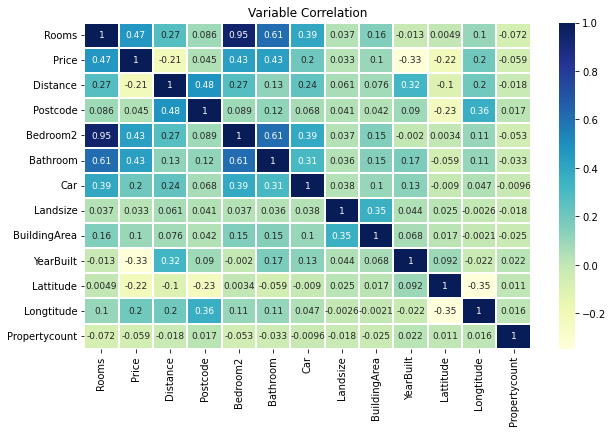

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), cmap = 'YlGnBu', linewidth = 1, annot = True, annot_kws = {'size':9})
plt.title('Variable Correlation') 

In [ ]:
#According to this dataset, Price and number of rooms,bedroom,bathroom are positively corelated with each other

In [ ]:
#Checking for missing values
print("Missing values of each column")
print(df.isna().sum())
print("Total missing values:",df.isna().sum().sum())

Missing values of each column
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64
Total missing values: 100975


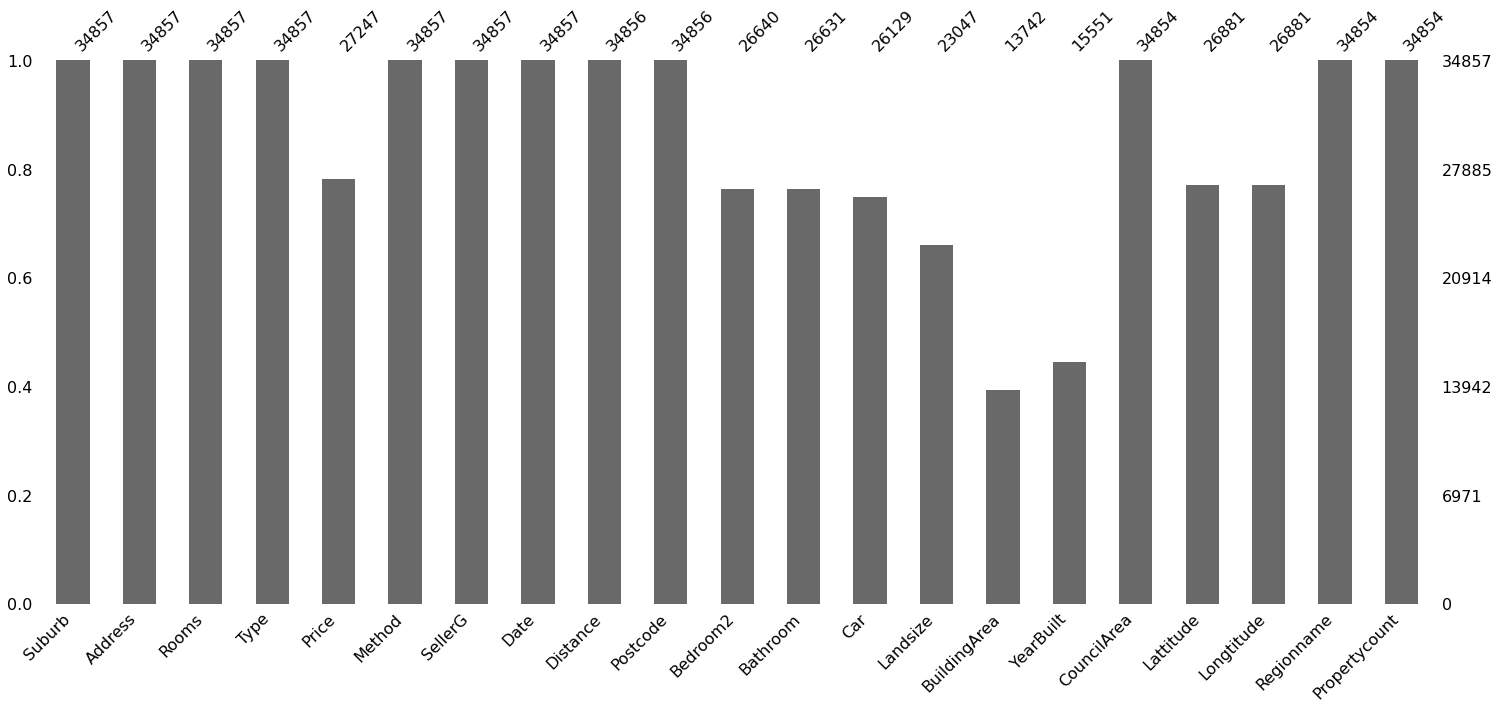

In [ ]:
msno.bar(df)

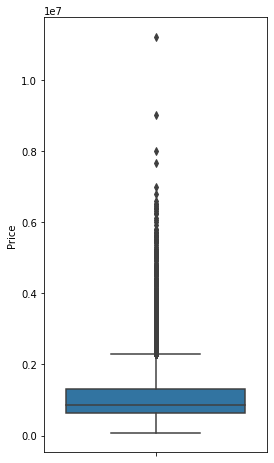

In [ ]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df.Price)

In [ ]:
# Replacing values for each column are imputed by :
#   Price : Median
#   Postcode : Median
#   Distance : Mean
#   Bathroom : 1 ; As every house will have a minimum of one bathroom
#   Bedroom2 : 1 ;  As every house will have a minimum of one bedroom
#   Car : mean ; based on number of carspots available in different types of houses
#   Landsize : median
#   BuildingArea : mean
#   YearBuilt : mean
df['Price'].fillna(df['Price'].median(), inplace = True)
df['Distance'].fillna(df['Distance'].mean(), inplace = True)
df['Postcode'].fillna(df['Postcode'].median(), inplace = True)

In [ ]:
df.Bedroom2.value_counts()

3.0     11881
4.0      6348
2.0      5777
5.0      1427
1.0       966
6.0       168
7.0        30
0.0        17
8.0        13
9.0         5
10.0        4
30.0        1
20.0        1
16.0        1
12.0        1
Name: Bedroom2, dtype: int64

In [ ]:
df.Bathroom.value_counts()

1.0     12969
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
12.0        1
9.0         1
Name: Bathroom, dtype: int64

In [ ]:
df['Bathroom'].fillna(1, inplace= True)
df['Bedroom2'].fillna(1, inplace= True)

In [ ]:
#Type of houses available 
df.Type.value_counts(dropna=False).to_frame()

,Type
h,23980
u,7297
t,3580


In [ ]:
fig = px.pie(df.Type.value_counts(dropna=False), values='Type', names=['h','u','t'],
             title='Type of the houses available in Melbourne Area',width=600)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
#Car Parking available in each type of houses
# h - house
type_h=df.loc[(df['Type'] == 'h') ,['Type','Car']]
type_h.head(5)
type_h.Car.value_counts()[:2]


2.0    10436
Name: Car, dtype: int64

In [ ]:
#u - unit, duplex;
type_u=df.loc[(df['Type'] == 'u') ,['Type','Car']]
type_u.Car.value_counts()[:2]

1.0    3252
2.0     720
Name: Car, dtype: int64

In [ ]:
#t - townhouse
type_t=df.loc[(df['Type'] == 't') ,['Type','Car']]
type_t.Car.value_counts()[:2]

2.0    1058
Name: Car, dtype: int64

In [ ]:
#Houses and Townhouses : 2 Parking Spots
#Unit : 1 Parking Spot; Some are also available for 2
#Most Expensive House
most_exp=pd.DataFrame(df.groupby('Type')['Price'].max()).reset_index().sort_values(by='Price', ascending=False).reset_index().drop('index',axis=1)
most_exp.head()

,Type,Price
0,h,11200000.0
1,u,6500000.0
2,t,3820000.0


In [ ]:
px.bar(y='Price', x='Type', data_frame=most_exp[:10],width=400,height=300)

In [ ]:
df.Regionname.value_counts()

Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: Regionname, dtype: int64

In [ ]:
#Ten Most Largest Land Size of Houses - H Type
houses=df.loc[df.Type == 'h', :].sort_values('Landsize')
houses.Landsize.value_counts().to_frame().head(10)

,Landsize
0.0,222
650.0,200
697.0,122
585.0,97
700.0,86
604.0,82
696.0,80
534.0,79
652.0,67
600.0,67


In [ ]:
#Ten Most Largest Land Size of Houses - T Type
houses=df.loc[df.Type == 't', :].sort_values('Landsize')
houses.Landsize.value_counts().to_frame().head(10)

,Landsize
0.0,179
158.0,12
217.0,9
184.0,9
200.0,9
219.0,9
300.0,8
215.0,8
224.0,8
159.0,8


In [ ]:
#Ten Most Largest Land Size of Houses - U Type
houses=df.loc[df.Type == 'u', :].sort_values('Landsize')
houses.Landsize.value_counts().to_frame().head(10)

,Landsize
0.0,2036
132.0,11
180.0,10
217.0,9
153.0,9
166.0,9
112.0,8
205.0,8
138.0,8
143.0,8


In [ ]:
df['Car'].fillna(df['Car'].mean(), inplace = True)
df['Landsize'].fillna(df['Landsize'].median(), inplace = True)
df['BuildingArea'].fillna(df['BuildingArea'].mean(), inplace = True)
df['YearBuilt'].fillna(df['YearBuilt'].mean(), inplace = True)

In [ ]:
df['CouncilArea'].value_counts(dropna=False)

Boroondara City Council           3675
Darebin City Council              2851
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Banyule City Council              1861
Moonee Valley City Council        1791
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1214
Yarra City Council                1186
Manningham City Council           1046
Hobsons Bay City Council           942
Kingston City Council              871
Whittlesea City Council            828
Wyndham City Council               624
Whitehorse City Council            618
Maroondah City Council             506
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                292
Frankston City Council   

In [ ]:
df.loc[(df['CouncilArea'].isna()) ,['Postcode','CouncilArea','Regionname']]

,Postcode,CouncilArea,Regionname
18523,3011.0,NaN,NaN
26888,3124.0,NaN,NaN
29483,3103.0,NaN,NaN


In [ ]:
#Selecting the dataframe that match postcode with missing values
ps_3011=df.loc[(df['Postcode']==3011 )]
print("Council Area based on postcode 3011 is ",ps_3011.CouncilArea.value_counts()[:1])
print("Region name based on postcode 3011 is ",ps_3011.Regionname.value_counts()[:1])

Council Area based on postcode 3011 is  Maribyrnong City Council    374
Name: CouncilArea, dtype: int64
Region name based on postcode 3011 is  Western Metropolitan    374
Name: Regionname, dtype: int64


In [ ]:
#Selecting the dataframe that match postcode with missing values
ps_3124=df.loc[(df['Postcode']==3124 )]
print("Council Area based on postcode 3124 is ",ps_3124.CouncilArea.value_counts()[:1])
print("Region name based on postcode 3124 is ",ps_3124.Regionname.value_counts()[:1])

Council Area based on postcode 3124 is  Boroondara City Council    422
Name: CouncilArea, dtype: int64
Region name based on postcode 3124 is  Southern Metropolitan    422
Name: Regionname, dtype: int64


In [ ]:
#Selecting the dataframe that match postcode with missing values
ps_3103=df.loc[(df['Postcode']==3103 )]
print("Council Area based on postcode 3103 is ",ps_3103.CouncilArea.value_counts()[:1])
print("Region name based on postcode 3103 is ",ps_3103.Regionname.value_counts()[:1])

Council Area based on postcode 3103 is  Boroondara City Council    330
Name: CouncilArea, dtype: int64
Region name based on postcode 3103 is  Southern Metropolitan    330
Name: Regionname, dtype: int64


In [ ]:
#Replacing missing values of CouncilArea based on Postcodes
df.loc[(df['CouncilArea'].isna()) & (df['Postcode']==3011) , 'CouncilArea'] = "Maribyrnong City Council"
df.loc[(df['CouncilArea'].isna()) & (df['Postcode']==3124) , 'CouncilArea'] = "Boroondara City Council"
df.loc[(df['CouncilArea'].isna()) & (df['Postcode']==3103) , 'CouncilArea'] = "Boroondara City Council"


In [ ]:
df.loc[(df['Regionname'].isna()) & (df['Postcode']==3011) , 'Regionname'] = "Western Metropolitan"
df.loc[(df['Regionname'].isna()) & (df['Postcode']==3124) , 'Regionname'] = "Southern Metropolitan"
df.loc[(df['Regionname'].isna()) & (df['Postcode']==3103) , 'Regionname'] = "Southern Metropolitan"

In [ ]:
df.sample(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34218,Epping,16 Dunolly St,4,h,681000.0,SP,Stockdale,24/02/2018,19.6,3076.0,...,3.0,2.0,350.0,210.0000,2008.000000,Whittlesea City Council,-37.63014,145.02428,Northern Metropolitan,10926.0
14352,Eltham North,1/59 Progress Rd,2,h,870000.0,SP,Ray,1/07/2017,18.0,3095.0,...,1.0,1.0,346.0,160.2564,1965.289885,Banyule City Council,-37.70042,145.13433,Eastern Metropolitan,2346.0
2448,Bulleen,28 Dale St,3,h,1340000.0,S,Barry,7/05/2016,11.8,3105.0,...,1.0,2.0,775.0,160.2564,1965.000000,Manningham City Council,-37.77900,145.10100,Eastern Metropolitan,4480.0


In [ ]:
#Ffill for Longitude and Latitude
df['Lattitude'].fillna(method='ffill', inplace=True)
df['Longtitude'].fillna(method='ffill', inplace=True)

In [ ]:
df.loc[(df['Propertycount'].isna()) ,['Landsize','Price','Type']]

,Landsize,Price,Type
18523,521.0,710000.0,u
26888,521.0,825000.0,h
29483,521.0,616000.0,h


In [ ]:
df.iloc[18521:18525]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18521,Footscray,27 Leander St,2,h,991000.0,S,Village,15/07/2017,5.1,3011.0,...,1.0,1.000000,318.0,106.0000,1910.000000,Maribyrnong City Council,-37.79529,144.88453,Western Metropolitan,7570.0
18522,Footscray,305/21 Moreland St,3,u,870000.0,W,McGrath,15/07/2017,5.1,3011.0,...,2.0,2.000000,4096.0,103.0000,2012.000000,Maribyrnong City Council,-37.80210,144.90750,Western Metropolitan,7570.0
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,...,1.0,1.728845,521.0,160.2564,1965.289885,Maribyrnong City Council,-37.80210,144.90750,Western Metropolitan,NaN
18524,Forest Hill,35 Panorama Dr,4,h,945000.0,S,Ray,15/07/2017,15.4,3131.0,...,2.0,2.000000,294.0,194.0000,2010.000000,Whitehorse City Council,-37.85156,145.16923,Eastern Metropolitan,4385.0


In [ ]:
df.iloc[26886:26890]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
26886,Camberwell,18 Cochran Av,3,h,3010000.0,S,Woodards,11/11/2017,7.7,3124.0,...,1.0,2.000000,835.0,160.2564,1965.289885,Boroondara City Council,-37.8398,145.0580,Southern Metropolitan,8920.0
26887,Camberwell,1A Gavan St,3,h,870000.0,SP,Jellis,11/11/2017,7.7,3124.0,...,1.0,2.000000,521.0,139.0000,1955.000000,Boroondara City Council,-37.8479,145.0955,Southern Metropolitan,8920.0
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,...,1.0,1.728845,521.0,160.2564,1965.289885,Boroondara City Council,-37.8479,145.0955,Southern Metropolitan,NaN
26889,Camberwell,1/12 Nelson Rd,3,h,1665000.0,S,Jellis,11/11/2017,7.7,3124.0,...,1.0,1.728845,521.0,160.2564,1965.289885,Boroondara City Council,-37.8479,145.0955,Southern Metropolitan,8920.0


In [ ]:
df['Propertycount'].fillna(method = 'ffill', inplace = True)

In [ ]:
print("Missing values of each column")
print(df.isna().sum())
print("Total missing values:",df.isna().sum().sum())

Missing values of each column
Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64
Total missing values: 0


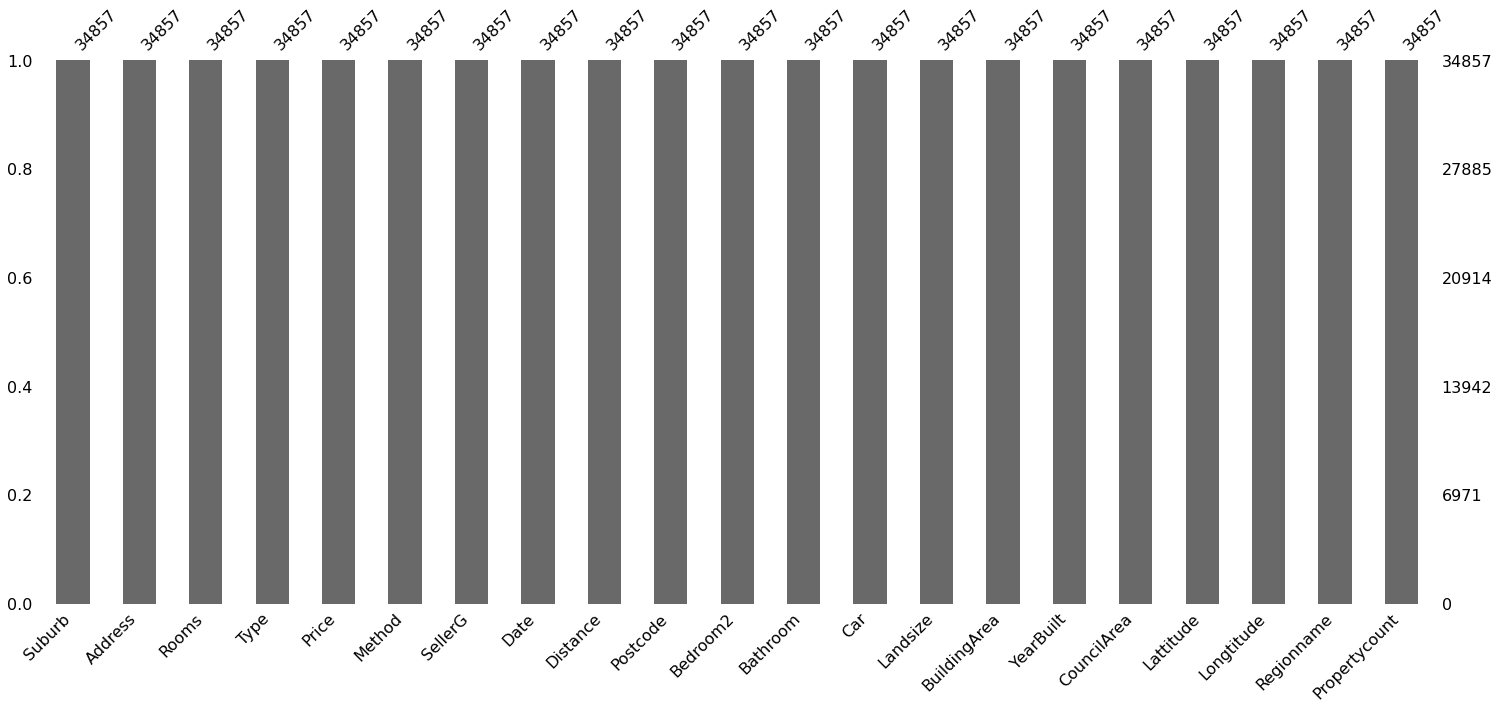

In [ ]:
msno.bar(df)

In [ ]:
df.sample(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13141,Maidstone,25 Thomson St,3,h,873000.0,S,Biggin,13/05/2017,9.2,3012.0,...,1.0,2.0,625.0,160.2564,1965.289885,Maribyrnong City Council,-37.78760,144.87520,Western Metropolitan,3873.0
24688,Rosanna,51 Stanton Cr,4,h,1120000.0,VB,Miles,14/10/2017,8.9,3084.0,...,2.0,1.0,521.0,160.2564,1965.289885,Banyule City Council,-37.73109,145.06977,Eastern Metropolitan,3540.0


In [ ]:
#Possible Categorical Column to Dummy columns
df_ = df.copy()
df_ = pd.get_dummies( df_, columns = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG','CouncilArea', 'Regionname'])
df_.head()

,Address,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,68 Studley St,870000.0,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,160.2564,...,1,0,0,0,1,0,0,0,0,0
1,85 Turner St,1480000.0,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,160.2564,...,1,0,0,0,1,0,0,0,0,0
2,25 Bloomburg St,1035000.0,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0000,...,1,0,0,0,1,0,0,0,0,0
3,18/659 Victoria St,870000.0,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,160.2564,...,1,0,0,0,1,0,0,0,0,0
4,5 Charles St,1465000.0,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0000,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
#Linear Regression Model
#Splitting the data set into training set
X = df_.drop(['Price','Address','Date'],axis=1) # Features
y=df_['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#70 % training and 30% testing

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

222412707839.454


In [ ]:
data= pd.DataFrame({'Actual_Price': np.round(y_test), 
                   'Predicted_Price': np.round(y_pred),
                 })
data['difference']=data.apply(lambda x: x.Predicted_Price-x.Actual_Price,axis=1)
data.head(10)

,Actual_Price,Predicted_Price,difference
10953,955000.0,1113662.0,158662.0
29454,411000.0,444070.0,33070.0
21866,875000.0,1118792.0,243792.0
5673,746000.0,866103.0,120103.0
22924,1250000.0,1128984.0,-121016.0
32052,950000.0,1006108.0,56108.0
33732,960000.0,832590.0,-127410.0
26658,801000.0,779436.0,-21564.0
21680,1740000.0,1529516.0,-210484.0
12148,690000.0,1046709.0,356709.0
